In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import streamlit as st
from scipy.stats import chi2_contingency

# DATA UNDERSTANDING

In [2]:
df = pd.read_csv('F:/Coapps/Medimapper/Medimapper_dataset.csv')

In [3]:
df.head()

,Name,Age,Blood Type,Gender,Test Result,Disease,Medication
0,Amber Nguyen,43,AB+,Male,Normal,Malaria,"['Antimalarial drugs', 'Antipyretics']"
1,Anthony Werner,76,B+,Male,Normal,Cervical spondylosis,"['Pain relievers', 'Muscle relaxants']"
2,Fred Clark,43,O-,Male,Normal,Hyperthyroidism,"['Antithyroid medications', 'Beta-blockers']"
3,Cody Taylor,61,O-,Male,Abnormal,Jaundice,['Liver transplant']
4,Derek Thompson,69,AB-,Female,Normal,Dimorphic hemorrhoids (piles),"['Pain relievers', 'Warm baths']"


In [5]:
 #df.shape

(5000, 7)

In [6]:
 # df.info

<bound method DataFrame.info of                     Name  Age Blood Type  Gender   Test Result  \
0           Amber Nguyen   43        AB+    Male        Normal   
1         Anthony Werner   76         B+    Male        Normal   
2             Fred Clark   43         O-    Male        Normal   
3            Cody Taylor   61         O-    Male      Abnormal   
4         Derek Thompson   69        AB-  Female        Normal   
...                  ...  ...        ...     ...           ...   
4995  Melissa Valenzuela   63         O+    Male  Inconclusive   
4996     Daniel Gonzalez   21         B+    Male  Inconclusive   
4997         Susan Glass   46         O+    Male        Normal   
4998      Rebecca Wagner   56        AB+  Female  Inconclusive   
4999      Joshua Cochran   39         A-    Male  Inconclusive   

                                     Disease  \
0                                    Malaria   
1                       Cervical spondylosis   
2                            Hy

In [7]:
#  print("Columns in the dataset:")
# for column in df.columns:
#     print(column)

Columns in the dataset:
Name
Age
Blood Type
Gender
Test Result
Disease
Medication


In [6]:
 df.describe()

,Age
count,5000.000000
mean,47.076200
std,21.552153
min,10.000000
25%,28.000000
50%,47.000000
75%,66.000000
max,84.000000


In [7]:
df.describe(include='O')

,Name,Blood Type,Gender,Test Result,Disease,Medication
count,5000,5000,5000,5000,5000,5000
unique,4825,8,2,3,43,250
top,Jessica Smith,AB+,Male,Normal,Impetigo,"['Antibiotics', 'Antipyretics']"
freq,6,1176,2711,2476,228,148


In [10]:
# for column in df.columns:
#     # unique_values = df[column].unique()
#     print(f"Unique values in {column}: {unique_values}")

Unique values in Name: ['Amber Nguyen' 'Anthony Werner' 'Fred Clark' ... 'Susan Glass'
 'Rebecca Wagner' 'Joshua Cochran']
Unique values in Age: [43 76 61 69 73 56 22 29 39 70 58 79 74 68 42 18 54 11 26 36 27 38 40 67
 63 62 47 84 78 35 55 31 34 71 21 10 16 66 64 37 13 75 57 17 23 50 82 15
 24 30 51 46 32 41 25 19 81 59 80 48 77 53 45 72 65 60 12 83 28 33 49 44
 52 20 14]
Unique values in Blood Type: ['AB+' 'B+' 'O-' 'AB-' 'B-' 'O+' 'A-' 'A+']
Unique values in Gender: ['Male' 'Female']
Unique values in Test Result: ['Normal' 'Abnormal' 'Inconclusive']
Unique values in Disease: ['Malaria' 'Cervical spondylosis' 'Hyperthyroidism' 'Jaundice'
 'Dimorphic hemorrhoids (piles)' 'Hypothyroidism'
 'GERD (Gastroesophageal Reflux Disease)' 'Impetigo' 'Alcoholic hepatitis'
 'Urinary tract infection' 'Acne' 'Chronic cholestasis' 'Hypoglycemia'
 'Heart attack' 'Common Cold' 'Tuberculosis' 'Fungal infection'
 'Hepatitis B' 'Psoriasis' 'Peptic ulcer disease' 'Varicose veins'
 'Chickenpox' 'Vertigo (Pa

## DATA CLEANING

In [8]:
df.drop(['Name'],axis=1,inplace = True)

In [9]:
df.head()

,Age,Blood Type,Gender,Test Result,Disease,Medication
0,43,AB+,Male,Normal,Malaria,"['Antimalarial drugs', 'Antipyretics']"
1,76,B+,Male,Normal,Cervical spondylosis,"['Pain relievers', 'Muscle relaxants']"
2,43,O-,Male,Normal,Hyperthyroidism,"['Antithyroid medications', 'Beta-blockers']"
3,61,O-,Male,Abnormal,Jaundice,['Liver transplant']
4,69,AB-,Female,Normal,Dimorphic hemorrhoids (piles),"['Pain relievers', 'Warm baths']"


In [13]:
# df.isnull().sum()

Age            0
Blood Type     0
Gender         0
Test Result    0
Disease        0
Medication     0
dtype: int64

In [14]:
# df.duplicated().sum()

178

In [10]:
df.drop_duplicates(inplace=True)

In [16]:
# df.shape

(4822, 6)

In [17]:
# # Function to detect outliers using IQR method
# def detect_outliers_iqr(column):
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = column[(column < lower_bound) | (column > upper_bound)]
#     return outliers

# outliers_age = detect_outliers_iqr(df['Age'])

# if not outliers_age.empty:
#     print("Outliers in the 'Age' column:")
#     print(outliers_age)
# else:
#     print("No outliers found in the 'Age' column.")


No outliers found in the 'Age' column.


## EXPLORATORY DATA ANALYSIS

In [18]:
# for col in df.columns:
#     most_frequent_values = df[col].value_counts().head(5)
#     print(f"Most frequent values in {col}:")
#     print(most_frequent_values)
#     print()


Most frequent values in Age:
Age
68    83
46    78
56    77
79    77
37    76
Name: count, dtype: int64

Most frequent values in Blood Type:
Blood Type
AB+    1109
O+      827
B+      794
O-      439
A+      419
Name: count, dtype: int64

Most frequent values in Gender:
Gender
Male      2603
Female    2219
Name: count, dtype: int64

Most frequent values in Test Result:
Test Result
Normal          2357
Inconclusive    1456
Abnormal        1009
Name: count, dtype: int64

Most frequent values in Disease:
Disease
Impetigo                   216
Acne                       214
Tuberculosis               210
Urinary tract infection    192
Hypertension               184
Name: count, dtype: int64

Most frequent values in Medication:
Medication
['Antibiotics', 'Antipyretics']             144
['Insulin', 'Metformin']                     98
['Antibiotics', 'Analgesics']                88
['Antibiotics', 'Urinary analgesics']        86
['IV fluids', 'Medications for itching']     81
Name: count, dty

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


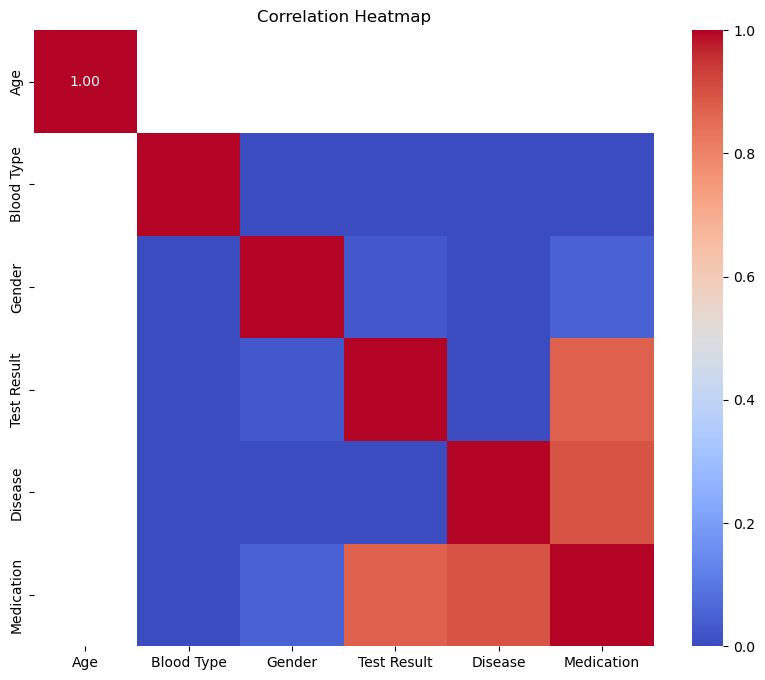

In [19]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate correlation matrix
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate correlation for numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for col1 in numerical_columns:
    for col2 in numerical_columns:
        corr_matrix.loc[col1, col2] = df[col1].corr(df[col2])

# Calculate correlation for categorical columns using Cramer's V
categorical_columns = df.select_dtypes(include=['object']).columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


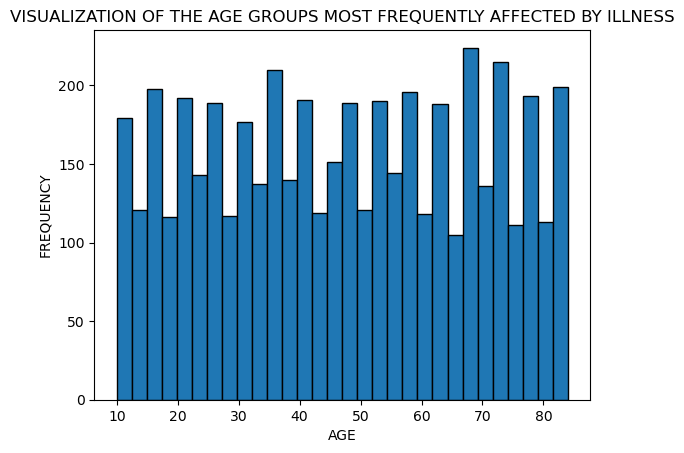

In [20]:
plt.hist(df['Age'],bins=30,edgecolor="black")
plt.xlabel('AGE')
plt.ylabel('FREQUENCY')
plt.title('VISUALIZATION OF THE AGE GROUPS MOST FREQUENTLY AFFECTED BY ILLNESS')
plt.show()

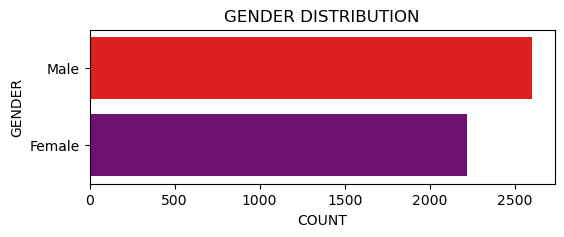

In [21]:
custom_palette = {'Male': 'red', 'Female': 'purple'}
plt.figure(figsize=(6, 2))
sns.countplot(y='Gender', data=df, order=df['Gender'].value_counts().index, palette=custom_palette)
plt.title('GENDER DISTRIBUTION')
plt.xlabel('COUNT')
plt.ylabel('GENDER')
plt.show()

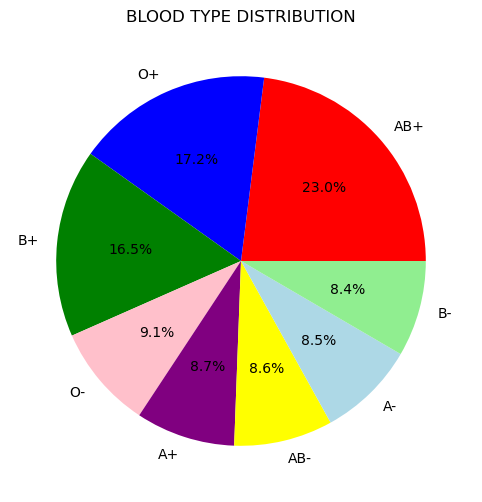

In [22]:
plt.figure(figsize=(8, 6))
df['Blood Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue', 'green', 'pink','purple','yellow','lightblue','lightgreen'])
plt.title('BLOOD TYPE DISTRIBUTION')
plt.ylabel('')
plt.show()


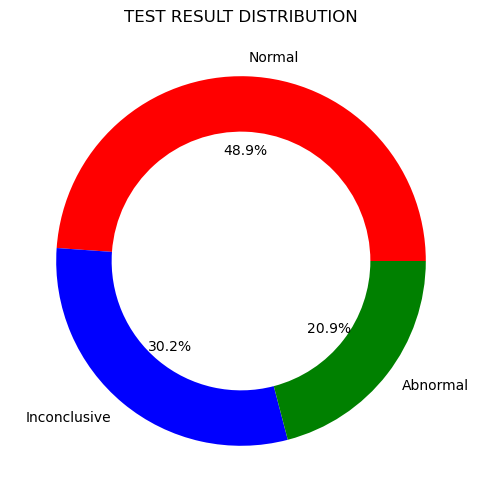

In [23]:
plt.figure(figsize=(8, 6))
df['Test Result'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue', 'green'], wedgeprops=dict(width=0.3))
plt.title('TEST RESULT DISTRIBUTION')
plt.ylabel('')
plt.show()

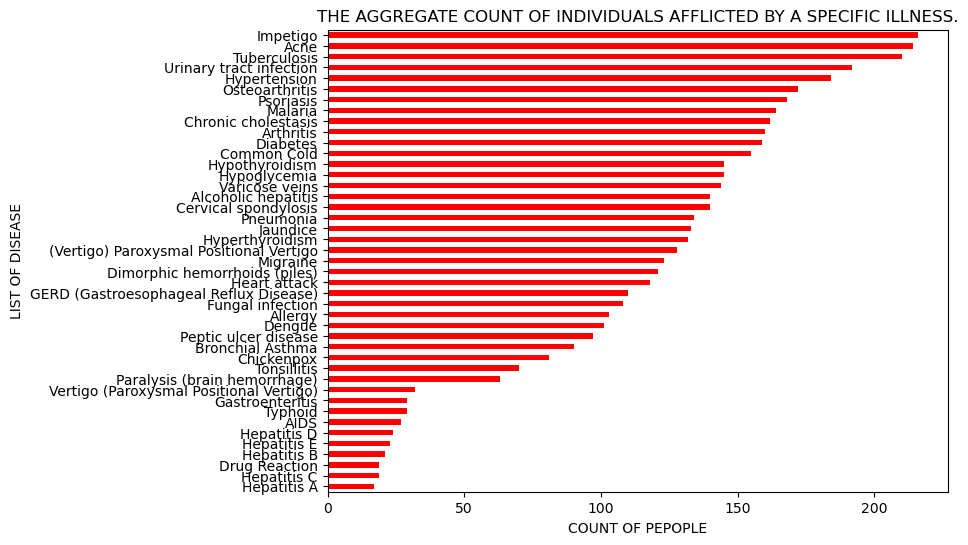

In [24]:
plt.figure(figsize=(8, 6))
df['Disease'].value_counts().sort_values().plot(kind='barh', color='red')
plt.title('THE AGGREGATE COUNT OF INDIVIDUALS AFFLICTED BY A SPECIFIC ILLNESS.')
plt.xlabel('COUNT OF PEPOPLE')
plt.ylabel('LIST OF DISEASE')
plt.show()

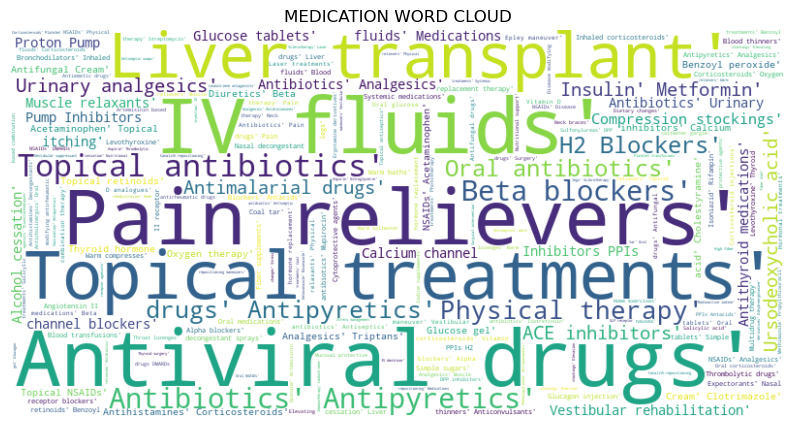

In [25]:
from wordcloud import WordCloud
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Medication']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('MEDICATION WORD CLOUD')
plt.show()


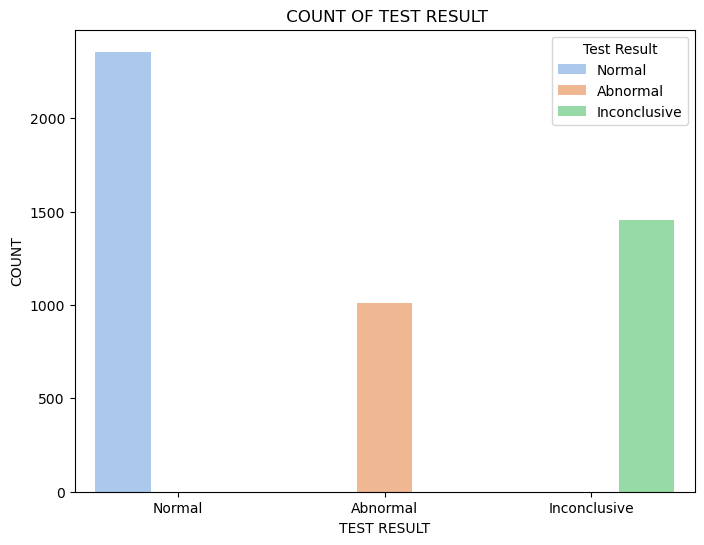

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Test Result', hue='Test Result', data=df, palette='pastel')
plt.title(' COUNT OF TEST RESULT')
plt.xlabel('TEST RESULT')
plt.ylabel('COUNT')
plt.show()

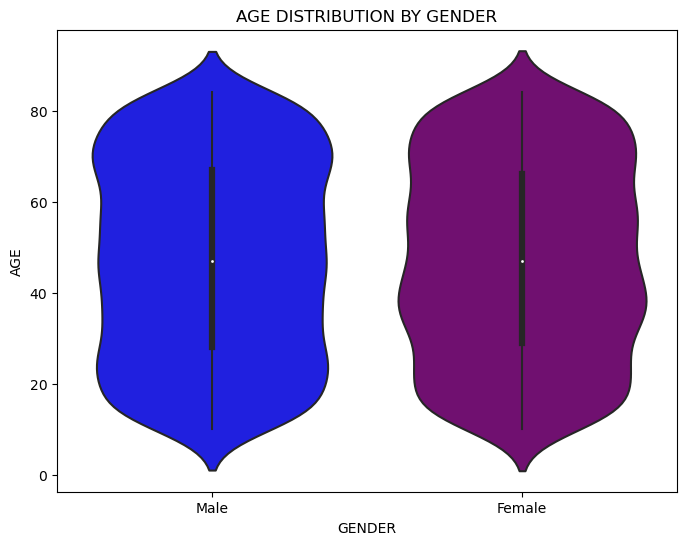

In [27]:
custom_palette = {'Male': 'blue', 'Female': 'purple'}
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Age', data=df, palette=custom_palette)
plt.title('AGE DISTRIBUTION BY GENDER')
plt.xlabel('GENDER')
plt.ylabel('AGE')
plt.show()

<Figure size 1200x800 with 0 Axes>

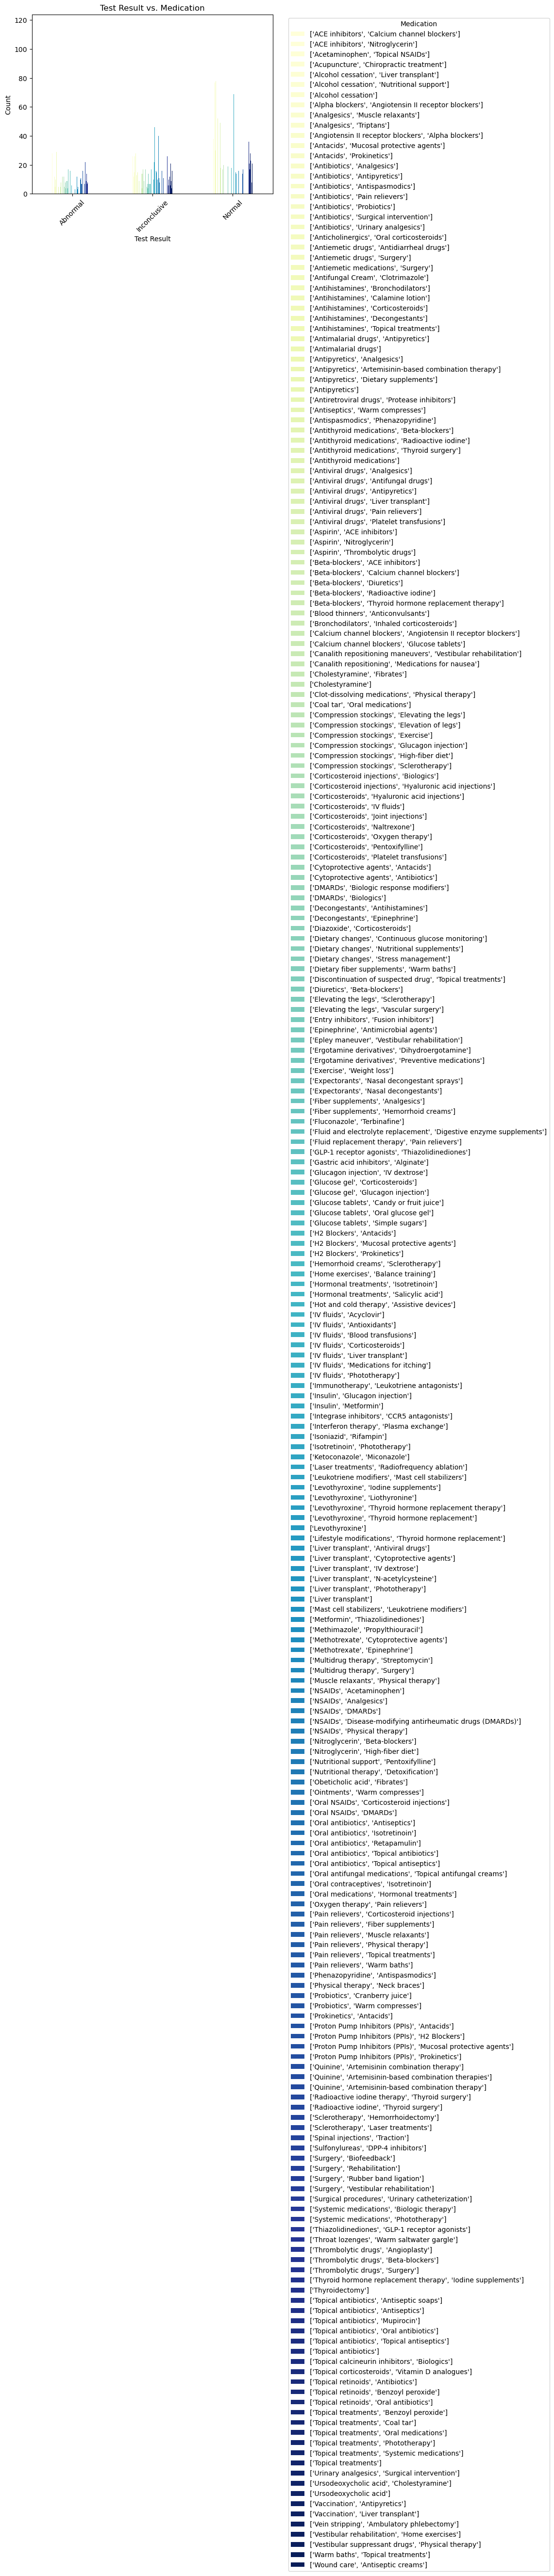

In [28]:
test_medication = df.groupby(['Test Result', 'Medication']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
test_medication.plot(kind='bar', stacked=False, cmap='YlGnBu')
plt.title('Test Result vs. Medication')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Medication', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## DATA PREPROCESSING

In [11]:
categorical_columns = ['Disease','Test Result']
numerical_columns = ['Age']

X = df[categorical_columns + numerical_columns]
y = df['Medication']

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns,)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

## DATA MODELLING

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=22)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=22)

In [16]:
y_pred=classifier.predict(X_test)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Decision Tree Classifier")
print("Test Accuracy: {:.2f}".format(accuracy))

Decision Tree Classifier
Test Accuracy: 97.86


In [25]:
# # Compute aggregated confusion matrix
# aggregated_cm = np.sum(cm, axis=0)

# # Print aggregated confusion matrix as an array
# # print(aggregated_cm)

[20  3 22  4  7  4  8  1  9 21 14  5  4 20 38  7 10  6  1 23  7  3  6  2
 17  3  3 26 10  1 21 10 17  1  1  3  7  2  8  1  1  9  7  8 20 16 13  7
  5  9  0  2  3  1  4 15 17  2  1  8  6  8  4  4  7  9  6  3  2  2  4  2
  2  3  2  6  4 15  7  6  1  2  2  1  3  1  4  6  1  1 15  6  2  1  0  7
  7  1 13  6  5  4  9  4  2  5  2  6  3  4  2 11 13 13  1  3  2  3  0  6
  3  3  2 14  5  6 27  2 33  5  1 18  2  5  3  2  7  3  6  6 12  2  6  8
  1  1  4  2  3  4  3  1  7  1  9 20 15  6  7 12  1  3  2  3  4  3  3  2
  4  6  7  3  2  3  2  6  4  5  8  4  4  9  3  4  4  3  2  6 11  2  1  2
  3  4  0  5  2  8  1  1  3  1  2  3  1 10  4  3  1  3  1  8 11 11 10  6
  5  4 13  4 16  4  8  4  3  8  8 13  1 13  9  2  2  6  6  6  3]


In [32]:
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)
# cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
# print("Cross-validation Scores:", cv_scores)
# print("Mean Cross-validation Score:", np.mean(cv_scores))
# print("Standard Deviation of Cross-validation Scores:", np.std(cv_scores))


Cross-validation Scores: [0.97037037 0.97333333 0.98666667 0.98962963 0.97777778]
Mean Cross-validation Score: 0.9795555555555555
Standard Deviation of Cross-validation Scores: 0.007460550110823223


In [55]:
from sklearn.feature_selection import chi2
X = df[['Age', 'Gender', 'Blood Type', 'Disease', 'Test Result']]
X_encoded = pd.get_dummies(X)
y = df['Medication']
chi_scores, p_values = chi2(X_encoded, y)
feature_scores = list(zip(X_encoded.columns, chi_scores, p_values))
feature_scores.sort(key=lambda x: x[1], reverse=True)
for feature, chi_score, p_value in feature_scores:
    print(f"Feature: {feature}, Chi-square Score: {chi_score}, P-value: {p_value}")


Feature: Age, Chi-square Score: 29881.65931799067, P-value: 0.0
Feature: Disease_Hepatitis E, Chi-square Score: 4799.000000000003, P-value: 0.0
Feature: Disease_AIDS, Chi-square Score: 4795.000000000005, P-value: 0.0
Feature: Disease_Gastroenteritis, Chi-square Score: 4792.999999999997, P-value: 0.0
Feature: Disease_Paralysis (brain hemorrhage), Chi-square Score: 4759.000000000006, P-value: 0.0
Feature: Disease_Bronchial Asthma, Chi-square Score: 4732.000000000005, P-value: 0.0
Feature: Disease_Fungal infection, Chi-square Score: 4713.999999999994, P-value: 0.0
Feature: Disease_Dimorphic hemorrhoids (piles), Chi-square Score: 4701.000000000001, P-value: 0.0
Feature: Disease_Cervical spondylosis, Chi-square Score: 4682.000000000005, P-value: 0.0
Feature: Disease_Alcoholic hepatitis, Chi-square Score: 4681.999999999998, P-value: 0.0
Feature: Disease_Hypoglycemia, Chi-square Score: 4676.999999999986, P-value: 0.0
Feature: Disease_Common Cold, Chi-square Score: 4667.000000000009, P-value: 

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(random_state=22)
classifier2.fit(X_train, y_train)

RandomForestClassifier(random_state=22)

In [36]:
y_pred_train =classifier2.predict(X_train)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Random Forest Classifier")
print("Test Accuracy: {:.2f}".format(accuracy))

Random Forest Classifier
Test Accuracy: 97.86


In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=5) 
classifier4.fit(X_train, y_train)


KNeighborsClassifier()

In [39]:
y_pred=classifier4.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("KNN")
print("Test Accuracy: {:.2f}".format(accuracy))

KNN
Test Accuracy: 54.25


In [40]:
from sklearn.svm import SVC

classifier6 = SVC(random_state=22)
classifier6.fit(X_train, y_train)


SVC(random_state=22)

In [42]:
y_pred=classifier6.predict(X_test)
print("Support Vector Machines")
print("Test Accuracy: {:.2f}".format(accuracy))

Support Vector Machines
Test Accuracy: 3.87


In [55]:
st.set_page_config(layout="wide")
with st.sidebar:
    st.title("Medication Recommendation System")  
    st.markdown(
        """
        ## About the Project
        
        This is a Medication Recommendation System designed to provide personalized medication recommendations 
        based on user inputs such as age, gender, blood type, disease, and test results. Simply fill in the 
        required information and click the button to get your medication recommendation.
        """
    )
with st.container():
    st.subheader("User Inputs")
    with st.form(key='my_form'):
        age = st.slider("Age", min_value=1, max_value=100, value=30)
        gender = st.radio("Gender", ["Male", "Female"])
        blood_type = st.selectbox("Blood Type", ["A", "A-", "B", "B-", "AB", "AB-", "O", "O-"])
        disease = st.selectbox("Disease", ["Acne", "Osteoarthritis", "Bronchial Asthma", "Alcoholic hepatitis", "Impetigo",
                                           "Tonsillitis", "(Vertigo) Paroxysmal Positional Vertigo",
                                           "Dimorphic hemorrhoids (piles)", "Tuberculosis", "Pneumonia", "Varicose veins",
                                           "Hypothyroidism", "Heart attack", "Hypoglycemia", "Cervical spondylosis",
                                           "Diabetes", "Common Cold", "Arthritis", "Hypertension", "Chronic cholestasis",
                                           "Migraine", "Urinary tract infection", "Hyperthyroidism",
                                           "GERD (Gastroesophageal Reflux Disease)", "Allergy", "Chickenpox", "Dengue",
                                           "Psoriasis", "Malaria", "Fungal infection", "Jaundice", "Hepatitis A",
                                           "Paralysis (brain hemorrhage)", "Peptic ulcer disease",
                                           "Vertigo (Paroxysmal Positional Vertigo)", "Hepatitis B", "Gastroenteritis",
                                           "Typhoid", "AIDS", "Hepatitis E", "Drug Reaction", "Hepatitis C", "Hepatitis D"])
        test_result = st.selectbox("Test Result", ["Normal", "Abnormal", "Inconclusive"])
        submit_button = st.form_submit_button(label='Get Recommendation', help='Click to get medication recommendation')
    if submit_button:
        input_data = pd.DataFrame({
            'Age': [age],
            'Gender': [gender],
            'Blood Type': [blood_type],
            'Disease': [disease],
            'Test Result': [test_result]
        })
        input_data_encoded = preprocessor.transform(input_data)
        medication = classifier.predict(input_data_encoded)
        st.subheader("Recommended Medication")
        st.write(medication[0])